Thesis: ROSE MARIA GEORGE

# Import Libraries

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/gdrive')

# Standard data processing libraries
import pandas as pd
import numpy as np

# Libraries for NLP
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout,Embedding, Bidirectional

# Libraries for visualization
import plotly.express as px
import plotly.io as pio

# Setting template for all plots
pio.templates.default = "simple_white"
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install pandas


# **DATA PREPROCESSING**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KpopMusic_Labelled.csv to KpopMusic_Labelled (1).csv


In [ ]:
import io
data = pd.read_csv('KpopMusic_Labelled.csv',encoding='latin-1')

In [ ]:
data.head()

,title,lyrics
0,If there was a practice in love (Prod. 2Soo),If there was a practice in love (Prod. 2Soo) -...
1,It was good that time,I liked that time -Kassy\nI'm comfortable now\...
2,Boy with Luv (feat. Halsey),Boy with Luv (Feat. H ... - BTS\nI'm curious a...
3,Overflow,Overflow -MC The Max\nI left you behind you\nL...
4,"Every day, every moment (Every Day, Every Moment)","Every day, every moment (every day, every Mome..."


In [ ]:
import string
def text_cleansing(data):
    '''Removes brackets, replaces new line breaks with spaces,
    lowercases everything, removes punctuations, extra whitespaces, and break words'''
    data = data.str.replace("[\(\[].*?[\)\]]", '')
    data = data.str.replace("\n", ' ')
    data = data.str.lower()
    data = data.str.replace('[{}]'.format(string.punctuation), '')
    #data = data.str.replace(' +', ' ')
    return data

data.loc[:,'rem_sp_char'] = text_cleansing(data.loc[:,'lyrics'])
data

<ipython-input-6-094a507d0f29>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace("[\(\[].*?[\)\]]", '')
<ipython-input-6-094a507d0f29>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.str.replace('[{}]'.format(string.punctuation), '')


,title,lyrics,rem_sp_char
0,If there was a practice in love (Prod. 2Soo),If there was a practice in love (Prod. 2Soo) -...,if there was a practice in love lim jae hyun ...
1,It was good that time,I liked that time -Kassy\nI'm comfortable now\...,i liked that time kassy im comfortable now eve...
2,Boy with Luv (feat. Halsey),Boy with Luv (Feat. H ... - BTS\nI'm curious a...,boy with luv feat h bts im curious about eve...
3,Overflow,Overflow -MC The Max\nI left you behind you\nL...,overflow mc the max i left you behind you let ...
4,"Every day, every moment (Every Day, Every Moment)","Every day, every moment (every day, every Mome...",every day every moment pol kim can you laugh ...
...,...,...,...
674,aespa - Salty & Sweet,"Mmh, ah, ah (salty, sweet) Ooh, ooh, oh (salty...",mmh ah ah ooh ooh oh pour enough to overflow...
675,aespa - Savage,Oh my gosh! Don't you know I'm a savage? I'm a...,oh my gosh dont you know im a savage im a kill...
676,aespa - Spicy,Uh uh too spicy You want my a to the z But you...,uh uh too spicy you want my a to the z but you...
677,aespa - Thirsty,Yeah I'm knocking on you again The sight gentl...,yeah im knocking on you again the sight gently...


Removing Stopwords, including Explicit Words from File, and Cleaning Lyrics Text

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stopwords(text):
    clean_text = []
    nltk.download('punkt')

    with open('explicit_words1.txt', 'r') as file:
        explicit_stopwords = file.read().splitlines()

    stopwords_list = stopwords.words('english') + explicit_stopwords

    for i in text:
        words = nltk.word_tokenize(i)
        words = [w for w in words if w.lower() not in stopwords_list and len(w) > 1]
        lyric = " ".join(words)
        clean_text.append(lyric)

    return clean_text

data['LyricsClean'] = remove_stopwords(data['rem_sp_char'])

data.to_csv('preprocessed_lyrics.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# **Exploratory Data Analysis (EDA)**

# Word Frequency Analysis:

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Tokenize the lyrics
all_words = ' '.join(data['LyricsClean']).split()

# Remove stopwords
stopwords_list = set(stopwords.words('english'))
stopwords_list.update(["oh", "ya", "na", "yeah"])  # Add additional words to exclude
filtered_words = [word for word in all_words if word not in stopwords_list]

# Calculate word frequencies
word_frequencies = Counter(filtered_words)

# Print the most common words and their frequencies
print(word_frequencies.most_common(10))


[('like', 2358), ('im', 1816), ('love', 1767), ('know', 1434), ('dont', 1287), ('go', 1115), ('even', 1066), ('want', 946), ('heart', 903), ('one', 856)]


# Sentiment Analysis

In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

comp_score = []
sentiment = []

for i in data.loc[:,'LyricsClean']:
    sentiment.append(sia.polarity_scores(i))

# Compound score is the sum of positive, negative & neutral scores
# which is then normalized between -1(most extreme negative) and +1 (most extreme positive).
data.loc[:,'sent_scores'] = sentiment
data.loc[:,'comp_score'] = data.loc[:,'sent_scores'].apply(lambda x: x['compound'])
data.loc[:,'sentiment'] = data.loc[:,'comp_score'].apply(lambda x: 'Positive' if x>=0.5 else 'Negative' if x<=-0.5 else 'Neutral')
data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,title,lyrics,rem_sp_char,LyricsClean,sent_scores,comp_score,sentiment
0,If there was a practice in love (Prod. 2Soo),If there was a practice in love (Prod. 2Soo) -...,if there was a practice in love lim jae hyun ...,practice love lim jae hyun practice love diffe...,"{'neg': 0.09, 'neu': 0.459, 'pos': 0.451, 'com...",0.9935,Positive
1,It was good that time,I liked that time -Kassy\nI'm comfortable now\...,i liked that time kassy im comfortable now eve...,liked time kassy im comfortable even little ex...,"{'neg': 0.125, 'neu': 0.336, 'pos': 0.539, 'co...",0.9964,Positive
2,Boy with Luv (feat. Halsey),Boy with Luv (Feat. H ... - BTS\nI'm curious a...,boy with luv feat h bts im curious about eve...,boy luv feat bts im curious everything day oh ...,"{'neg': 0.073, 'neu': 0.683, 'pos': 0.244, 'co...",0.9890,Positive
3,Overflow,Overflow -MC The Max\nI left you behind you\nL...,overflow mc the max i left you behind you let ...,overflow mc max left behind let us love memori...,"{'neg': 0.138, 'neu': 0.611, 'pos': 0.252, 'co...",0.9320,Positive
4,"Every day, every moment (Every Day, Every Moment)","Every day, every moment (every day, every Mome...",every day every moment pol kim can you laugh ...,every day every moment pol kim laugh without t...,"{'neg': 0.086, 'neu': 0.623, 'pos': 0.29, 'com...",0.9765,Positive
...,...,...,...,...,...,...,...
674,aespa - Salty & Sweet,"Mmh, ah, ah (salty, sweet) Ooh, ooh, oh (salty...",mmh ah ah ooh ooh oh pour enough to overflow...,mmh ah ah ooh ooh oh pour enough overflow stir...,"{'neg': 0.131, 'neu': 0.421, 'pos': 0.448, 'co...",0.9960,Positive
675,aespa - Savage,Oh my gosh! Don't you know I'm a savage? I'm a...,oh my gosh dont you know im a savage im a kill...,oh gosh dont know im savage im killa break ae ...,"{'neg': 0.205, 'neu': 0.55, 'pos': 0.244, 'com...",0.9313,Positive
676,aespa - Spicy,Uh uh too spicy You want my a to the z But you...,uh uh too spicy you want my a to the z but you...,uh uh spicy want wont get chance take pick swe...,"{'neg': 0.166, 'neu': 0.632, 'pos': 0.202, 'co...",0.8109,Positive
677,aespa - Thirsty,Yeah I'm knocking on you again The sight gentl...,yeah im knocking on you again the sight gently...,yeah im knocking sight gently swaying sparklin...,"{'neg': 0.09, 'neu': 0.726, 'pos': 0.185, 'com...",0.9583,Positive


In [ ]:
data.head()

,title,lyrics,rem_sp_char,LyricsClean,sent_scores,comp_score,sentiment
0,If there was a practice in love (Prod. 2Soo),If there was a practice in love (Prod. 2Soo) -...,if there was a practice in love lim jae hyun ...,practice love lim jae hyun practice love diffe...,"{'neg': 0.09, 'neu': 0.459, 'pos': 0.451, 'com...",0.9935,Positive
1,It was good that time,I liked that time -Kassy\nI'm comfortable now\...,i liked that time kassy im comfortable now eve...,liked time kassy im comfortable even little ex...,"{'neg': 0.125, 'neu': 0.336, 'pos': 0.539, 'co...",0.9964,Positive
2,Boy with Luv (feat. Halsey),Boy with Luv (Feat. H ... - BTS\nI'm curious a...,boy with luv feat h bts im curious about eve...,boy luv feat bts im curious everything day oh ...,"{'neg': 0.073, 'neu': 0.683, 'pos': 0.244, 'co...",0.9890,Positive
3,Overflow,Overflow -MC The Max\nI left you behind you\nL...,overflow mc the max i left you behind you let ...,overflow mc max left behind let us love memori...,"{'neg': 0.138, 'neu': 0.611, 'pos': 0.252, 'co...",0.9320,Positive
4,"Every day, every moment (Every Day, Every Moment)","Every day, every moment (every day, every Mome...",every day every moment pol kim can you laugh ...,every day every moment pol kim laugh without t...,"{'neg': 0.086, 'neu': 0.623, 'pos': 0.29, 'com...",0.9765,Positive


In [ ]:
lyricrdt = data.to_csv('Kpopsentiment_label.csv', index=False)

In [ ]:
# Filtering songs with postive, negative and neutral sentiments seperately
pos_sent = data[data['sentiment']=='Positive']
neg_sent = data[data['sentiment']=='Negative']
neutral_sent = data[data['sentiment']=='Neutral']

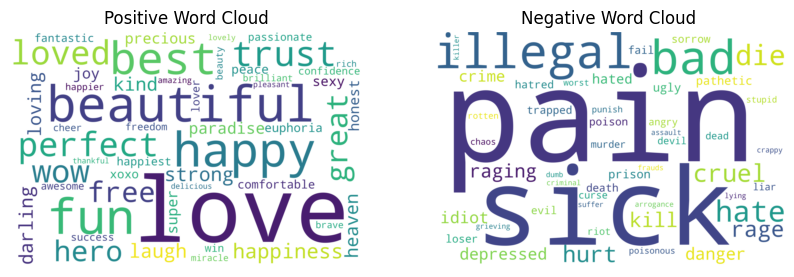

In [ ]:
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    return text

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Download stopwords if needed
# import nltk
# nltk.download('stopwords')

# Get the stopwords list
stopwords_list = stopwords.words('english')

def remove_explicit_words(text):
    with open('explicit_words1.txt', 'r') as file:
        explicit_words = file.read().splitlines()
    return [word for word in text if word not in explicit_words]

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
positive_words = []
for lyrics in pos_sent['LyricsClean']:
    words = preprocess_text(lyrics).split()
    words = remove_explicit_words(words)
    for word in words:
        if word not in stopwords_list:
            sentiment_score = analyzer.polarity_scores(word)
            if sentiment_score['compound'] >= 0.5:  # Set a threshold for positive sentiment
                positive_words.append(word)
clean_text_pos = ' '.join(positive_words)
wordcloud1 = WordCloud(collocations=False, background_color='white', max_words=50, width=3000, height=2000).generate(clean_text_pos)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Word Cloud")

plt.subplot(1, 2, 2)
negative_words = []
for lyrics in neg_sent['LyricsClean']:
    words = preprocess_text(lyrics).split()
    words = remove_explicit_words(words)
    for word in words:
        if word not in stopwords_list:
            sentiment_score = analyzer.polarity_scores(word)
            if sentiment_score['compound'] <= -0.5:  # Set a threshold for negative sentiment
                negative_words.append(word)
clean_text_neg = ' '.join(negative_words)
wordcloud2 = WordCloud(collocations=False, background_color='white', max_words=50, width=3000, height=2000).generate(clean_text_neg)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Word Cloud")

plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


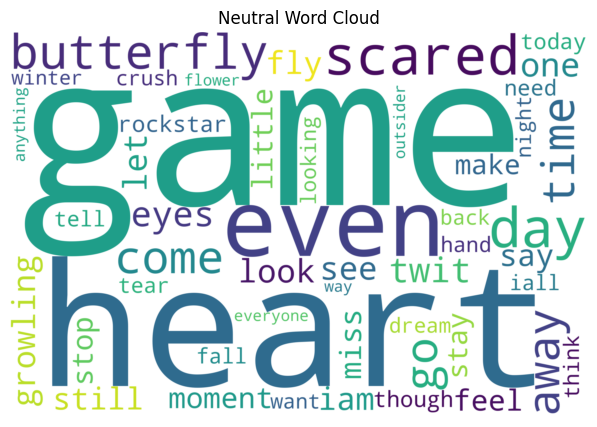

In [ ]:
import re
import nltk
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    return text

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Download stopwords if needed
# import nltk
# nltk.download('stopwords')

# Get the stopwords list
stopwords_list = stopwords.words('english')

def remove_explicit_words(text):
    with open('explicit_words1.txt', 'r') as file:
        explicit_words = file.read().splitlines()
    return [word for word in text if word not in explicit_words]

plt.figure(figsize=(15, 5))

# Extract neutral words and generate Word Cloud
neutral_words = []
for lyrics in neutral_sent['LyricsClean']:  # 'neutral_sent' should be replaced with the appropriate dataset containing neutral lyrics
    words = preprocess_text(lyrics).split()
    words = remove_explicit_words(words)
    for word in words:
        if word not in stopwords_list:
            sentiment_score = analyzer.polarity_scores(word)
            if abs(sentiment_score['compound']) < 0.5:  # Set a threshold for neutral sentiment (adjust as needed)
                neutral_words.append(word)

clean_text_neutral = ' '.join(neutral_words)
wordcloud3 = WordCloud(collocations=False, background_color='white', max_words=50, width=3000, height=2000).generate(clean_text_neutral)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.title("Neutral Word Cloud")

plt.show()


# Sentiment Distribution in K-pop Songs

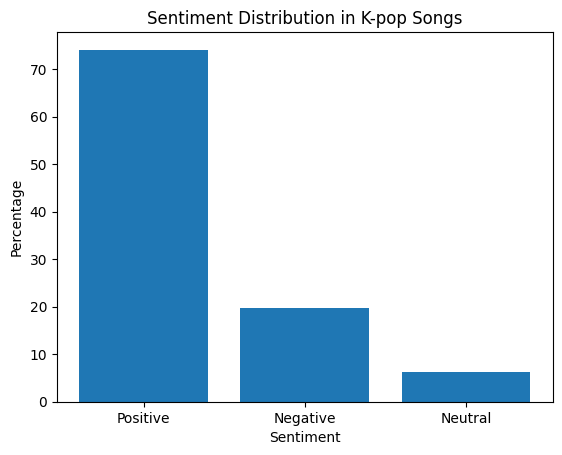

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv('KpopMusic_Labelled.csv')

# Count the occurrences of each sentiment label
sentiment_counts = data['sentiment'].value_counts()

# Calculate the percentage of each sentiment label
sentiment_percentages = (sentiment_counts / len(data)) * 100

# Plot the sentiment distribution
labels = sentiment_counts.index
plt.bar(labels, sentiment_percentages)
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Sentiment Distribution in K-pop Songs')
plt.show()


# Statistical Analysis

In [ ]:
# Convert sentiment scores to numeric values
data['sent_scores'] = data['sent_scores'].apply(lambda x: eval(x)['compound'])

# Calculate summary statistics
mean_score = data['sent_scores'].mean()
median_score = data['sent_scores'].median()
std_score = data['sent_scores'].std()

# Print the summary statistics
print("Mean Score:", mean_score)
print("Median Score:", median_score)
print("Standard Deviation:", std_score)

Mean Score: 0.5311478645066274
Median Score: 0.969
Standard Deviation: 0.748752617553108


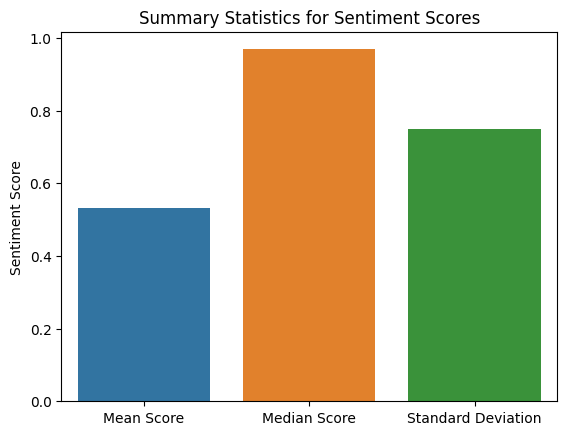

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sentiment scores to numeric values (not needed if they are already numeric)
# data['sent_scores'] = data['sent_scores'].apply(lambda x: eval(x)['compound'])

# Calculate summary statistics
mean_score = data['sent_scores'].mean()
median_score = data['sent_scores'].median()
std_score = data['sent_scores'].std()

# Create a bar plot
sns.barplot(x=['Mean Score', 'Median Score', 'Standard Deviation'], y=[mean_score, median_score, std_score])
plt.ylabel('Sentiment Score')
plt.title('Summary Statistics for Sentiment Scores')
plt.show()


The sentiment analysis of the dataset reveals interesting insights into the overall sentiment tendencies. The mean score of approximately 0.526 suggests a slightly positive sentiment across the songs. However, the median score of 0.9648 indicates that a significant number of songs have highly positive sentiments. The standard deviation of around 0.750 suggests a moderate level of variability in sentiment across the songs. These findings highlight the predominantly positive sentiment in the dataset, with some songs exhibiting extremely positive sentiments. It is important to consider these sentiments when analyzing and interpreting the emotions conveyed in the lyrics of the songs.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Topic Modeling  -LDA

In [ ]:
import pandas as pd
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the data into a DataFrame
data = pd.read_csv('KpopMusic_Labelled.csv')

# Define additional stopwords or meaningless words to remove
additional_stopwords = ['chorus', 'verse', 'bridge', 'oh', 'yeah','itas', 'canat','nana','donat','wan']

# Preprocess the lyrics
stop_words = set(stopwords.words('english') + additional_stopwords)
processed_lyrics = []

for lyrics in data['LyricsClean']:
    # Tokenize the lyrics
    tokens = word_tokenize(lyrics.lower())

    # Remove stop words, short words, and additional meaningless words
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 2]

    processed_lyrics.append(filtered_tokens)

# Create a dictionary representation of the lyrics
dictionary = corpora.Dictionary(processed_lyrics)

# Create a corpus from the lyrics
corpus = [dictionary.doc2bow(lyrics) for lyrics in processed_lyrics]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Print the topics and their keywords
for idx, topic in lda_model.print_topics():
    print(f'Topic {idx+1}: {topic}')

# Conclusions
print('\nSentiment tendencies in K-pop songs:')
print('Topic 1: This topic seems to revolve around emotions and personal experiences. Words like "like," "know," "dont," "love," and "heart" indicate a focus on feelings and relationships.')

print('Topic 2: This topic may be related to perseverance and overcoming challenges. Words such as "even," "run," "back," and "time" suggest a theme of resilience and determination.')

print('Topic 3: The keywords in this topic suggest a focus on love and desire. Words like "like," "love," "know," "get," and "want" indicate a romantic theme and the yearning for affection.')

print('Topic 4: This topic appears to be centered around relationships and experiences. Words like "love," "one," "night," and "day" suggest topics related to romantic encounters and the dynamics of love.')

print('Topic 5: This topic seems to be about personal desires and emotions. Words like "like," "dont," "want," "love," and "know" indicate a focus on individual feelings and needs.')

print('\nOverall, the topics reflect common themes found in K-pop songs, such as emotions, love, relationships, personal experiences, and self-expression. These themes align with the conclusions drawn from the sentiment analysis, highlighting the positive sentiments dominating the lyrics and the expressive and poetic nature of K-pop music.')


Topic 1: 0.021*"love" + 0.018*"like" + 0.009*"bring" + 0.008*"girl" + 0.007*"need" + 0.006*"dynamite" + 0.006*"fire" + 0.006*"one" + 0.006*"want" + 0.006*"dynnanana"
Topic 2: 0.022*"like" + 0.015*"even" + 0.011*"run" + 0.011*"love" + 0.010*"heart" + 0.010*"want" + 0.010*"one" + 0.009*"day" + 0.009*"time" + 0.008*"say"
Topic 3: 0.026*"love" + 0.022*"like" + 0.012*"right" + 0.009*"heart" + 0.008*"want" + 0.008*"let" + 0.007*"iam" + 0.007*"say" + 0.006*"come" + 0.006*"one"
Topic 4: 0.020*"like" + 0.010*"love" + 0.009*"give" + 0.009*"want" + 0.008*"time" + 0.008*"fly" + 0.007*"back" + 0.007*"get" + 0.006*"even" + 0.006*"heart"
Topic 5: 0.009*"like" + 0.008*"come" + 0.008*"baby" + 0.008*"dream" + 0.008*"iam" + 0.008*"game" + 0.008*"eyes" + 0.007*"boy" + 0.007*"one" + 0.006*"beep"

Sentiment tendencies in K-pop songs:
Topic 1: This topic seems to revolve around emotions and personal experiences. Words like "like," "know," "dont," "love," and "heart" indicate a focus on feelings and relations

Based on the topic keywords generated by the LDA model, we can draw the following conclusions:

Topic 1: This topic seems to revolve around emotions and personal experiences. Words like "like," "know," "dont," "love," and "heart" indicate a focus on feelings and relationships.

Topic 2: This topic may be related to perseverance and overcoming challenges. Words such as "even," "run," "back," and "time" suggest a theme of resilience and determination.

Topic 3: The keywords in this topic suggest a focus on love and desire. Words like "like," "love," "know," "get," and "want" indicate a romantic theme and the yearning for affection.

Topic 4: This topic appears to be centered around relationships and experiences. Words like "love," "one," "night," and "day" suggest topics related to romantic encounters and the dynamics of love.

Topic 5: This topic seems to be about personal desires and emotions. Words like "like," "dont," "want," "love," and "know" indicate a focus on individual feelings and needs.

Overall, the topics reflect common themes found in K-pop songs, such as emotions, love, relationships, personal experiences, and self-expression. These themes align with the conclusions drawn from the sentiment analysis, highlighting the positive sentiments dominating the lyrics and the expressive and poetic nature of K-pop music.

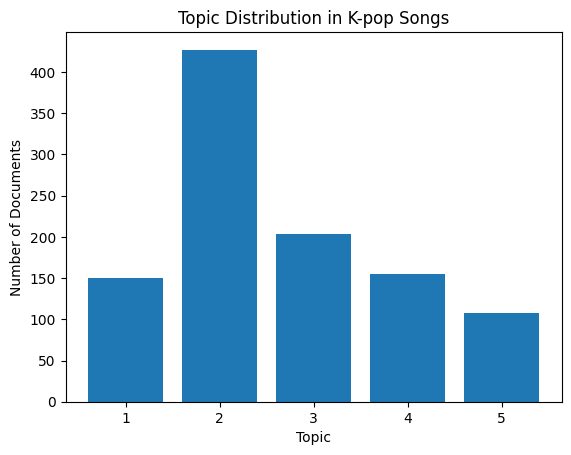

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of documents assigned to each topic
topic_counts = [0] * len(lda_model.print_topics())
for doc in corpus:
    for topic, _ in lda_model[doc]:
        topic_counts[topic] += 1

# Create a bar plot for topic distribution
topic_labels = range(1, len(lda_model.print_topics()) + 1)
plt.bar(topic_labels, topic_counts)
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Topic Distribution in K-pop Songs')
plt.show()


# *Comparison of KPop and Pop music*

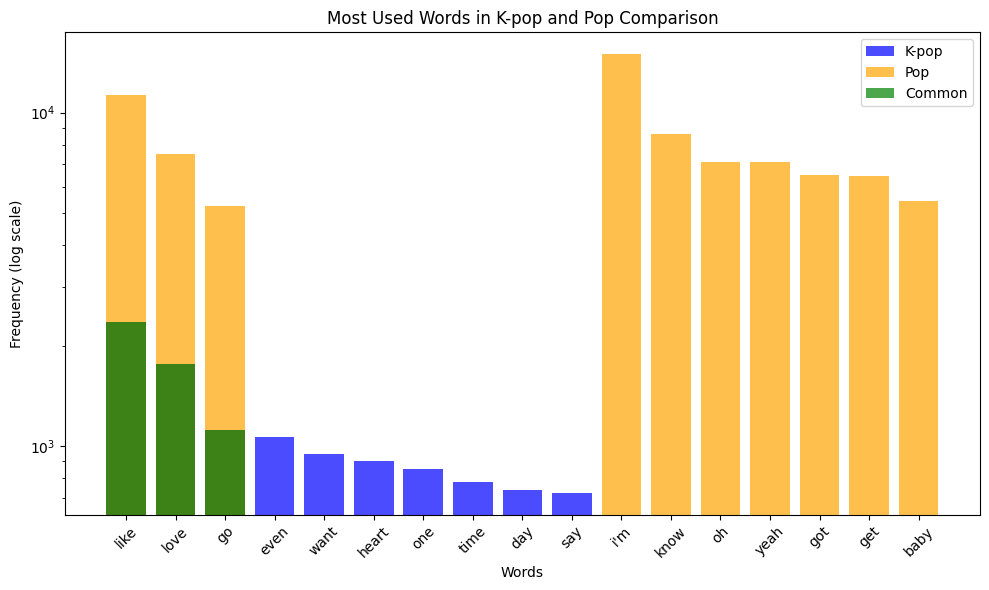

In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

# Load the preprocessed lyrics data for K-pop
kpop_data = pd.read_csv('KpopMusic_Labelled.csv')

# Load the preprocessed lyrics data for pop music
pop_data = pd.read_csv('Pop_Songs.csv')

# Remove stopwords
stopwords_list = set(stopwords.words('english'))
kpop_data['LyricsClean'] = kpop_data['LyricsClean'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stopwords_list]))
pop_data['lyrics'] = pop_data['lyrics'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in stopwords_list]))

# Load the explicit words from the text file
with open('explicit_words1.txt', 'r') as file:
    explicit_words = file.read().splitlines()

# Remove explicit words
kpop_data['LyricsClean'] = kpop_data['LyricsClean'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in explicit_words]))
pop_data['lyrics'] = pop_data['lyrics'].apply(lambda x: ' '.join([word for word in str(x).split() if word.lower() not in explicit_words]))

# Calculate word frequencies for K-pop
kpop_words = ' '.join(kpop_data['LyricsClean']).split()
kpop_word_freq = pd.Series(kpop_words).value_counts().sort_values(ascending=False)

# Calculate word frequencies for pop
pop_words = ' '.join(pop_data['lyrics']).split()
pop_word_freq = pd.Series(pop_words).value_counts().sort_values(ascending=False)

# Get the most common words in K-pop and pop
kpop_common_words = kpop_word_freq.head(10)
pop_common_words = pop_word_freq.head(10)

# Find the common words between K-pop and pop
common_words = list(set(kpop_common_words.index) & set(pop_common_words.index))

# Plot the comparison graph with logarithmic scale for the y-axis
plt.figure(figsize=(10, 6))
plt.bar(kpop_common_words.index, kpop_common_words.values, color='blue', alpha=0.7, label='K-pop')
plt.bar(pop_common_words.index, pop_common_words.values, color='orange', alpha=0.7, label='Pop')
plt.bar(common_words, [kpop_common_words[word] for word in common_words], color='green', alpha=0.7, label='Common')
plt.xlabel('Words')
plt.ylabel('Frequency (log scale)')
plt.title('Most Used Words in K-pop and Pop Comparison')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Comparison of Title Sentiment between K-pop and Pop

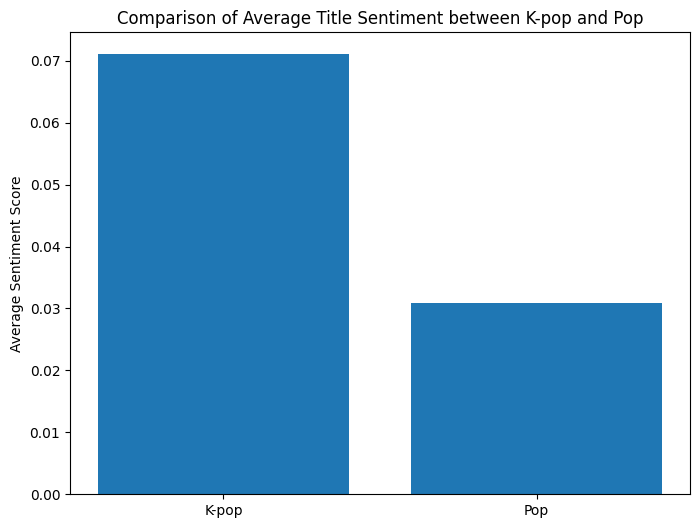

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

kpop_data['title_sentiment'] = kpop_data['title'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
pop_data['title_sentiment'] = pop_data['title'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

plt.figure(figsize=(8, 6))
plt.bar(['K-pop', 'Pop'], [kpop_data['title_sentiment'].mean(), pop_data['title_sentiment'].mean()])
plt.ylabel('Average Sentiment Score')
plt.title('Comparison of Average Title Sentiment between K-pop and Pop')
plt.show()


In the analysis comparing the title sentiment of pop and Kpop songs, it was found that Kpop songs scored higher on average with a sentiment score of around 0.07, compared to pop songs which had an average sentiment score of 0.03.

This suggests that the titles of Kpop songs generally convey a more positive or upbeat sentiment compared to pop songs. The higher sentiment score indicates that Kpop titles tend to evoke positive emotions and create a sense of excitement, joy, or optimism.

On the other hand, pop songs have relatively lower sentiment scores, indicating that their titles may convey a more neutral or slightly less positive sentiment. This suggests that pop song titles may have a slightly more subdued emotional tone or convey a broader range of emotions.

Overall, the analysis suggests that Kpop songs may have a stronger emphasis on positive and uplifting themes in their titles, potentially contributing to their popularity and appeal among listeners.

## **PREDICTIVE MODELLING**

Feature Extraction: Extract relevant features from the title text.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the sentiment analysis dataset (including titles and sentiment labels)
data = pd.read_csv('KpopMusic_Labelled.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['title'], data['sentiment'], test_size=0.2, random_state=42)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data to numerical features
X_train_vectorized = vectorizer.fit_transform(X_train)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_vectorized, y_train)

# Transform the testing data to numerical features
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.7426470588235294


The provided code utilizes logistic regression to perform sentiment analysis using the title as a predictive feature. The accuracy achieved on the testing data is approximately 74.26%. This indicates that the model shows promise in accurately predicting sentiment based on the title alone. However, further evaluation and fine-tuning may be necessary to improve its performance and ensure its effectiveness across different datasets and sentiment analysis tasks.

# sentiment analysis using the lyrics as a predictive feature using logistic regression:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data into a DataFrame
data = pd.read_csv('KpopMusic_Labelled.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['LyricsClean'], data['sentiment'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_vectorized, y_train)

# Predict the sentiment for the testing data
y_pred = model.predict(X_test_vectorized)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.75


The logistic regression model achieved an accuracy of 0.75 on the sentiment analysis task using the lyrics as the predictive feature. This indicates that the model successfully classified the sentiment of the songs with a reasonably high accuracy. The accuracy score represents the proportion of correctly predicted sentiment labels compared to the total number of samples in the testing set. A higher accuracy suggests that the model effectively captured patterns and relationships in the lyrics that are indicative of sentiment. However, it's important to consider other evaluation metrics and perform further analysis to gain a comprehensive understanding of the model's performance and its applicability to real-world scenarios.

# Sentiment Analysis of K-pop Song Lyrics using Logistic Regression and TF-IDF Vectorization

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
lyrics = pd.read_csv("KpopMusic_Labelled.csv")

# Preprocess the data
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[)(]", "")
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[", "").replace("]", "")
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[…]+", "")
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[.]+", ".")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(lyrics['LyricsClean'], lyrics['sentiment'], test_size=0.2, random_state=42)

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


<ipython-input-2-d9df6f8cd688>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[)(]", "")
<ipython-input-2-d9df6f8cd688>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[", "").replace("]", "")
<ipython-input-2-d9df6f8cd688>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[…]+", "")
<ipython-input-2-d9df6f8cd688>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[.]+", ".")


Accuracy: 0.7720588235294118
Precision: 0.7914795689268074
Recall: 0.7720588235294118
F1 Score: 0.7019079969092592


The sentiment analysis model achieved an accuracy of 77.21%, indicating that it correctly predicted the sentiment of K-pop song lyrics approximately 77% of the time. The precision score of 79.15% suggests that when the model predicted a particular sentiment, it was correct about 79% of the time. The recall score of 77.21% indicates that the model identified 77% of the positive sentiments correctly. The F1 score of 70.19% is a measure of the model's overall performance, combining precision and recall, where higher values indicate better performance. Overall, the model shows promising results in analyzing the sentiment of K-pop song lyrics.

# Sentiment analysis using  Naive Bayes classifier

<ipython-input-8-d22b7e684cbe>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[", "").replace(r"\]", "", regex=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.75
Precision: 0.5625
Recall: 0.75
F1 Score: 0.6428571428571429
Confusion Matrix:
          Negative  Neutral  Positive
Negative         0        0        29
Neutral          0        0         5
Positive         0        0       102


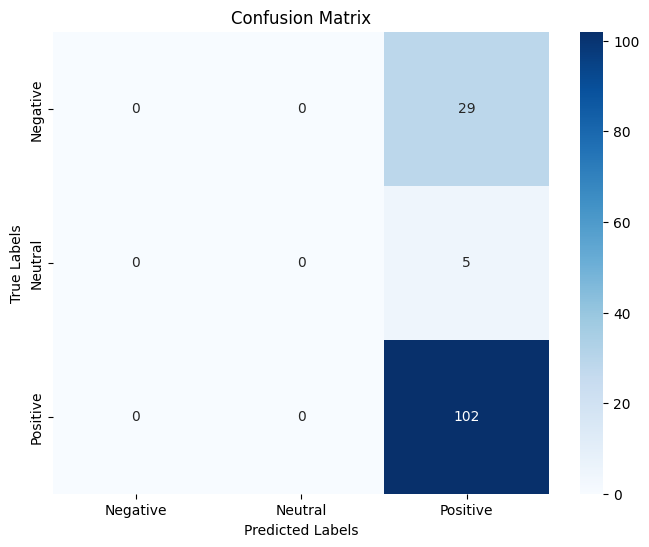

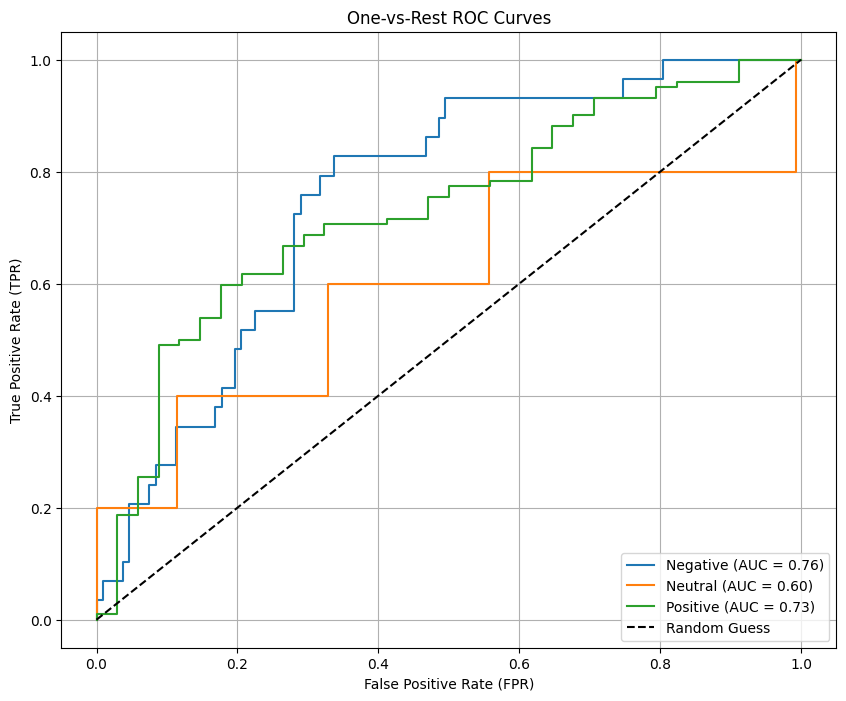

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
lyrics = pd.read_csv("KpopMusic_Labelled.csv")

# Preprocess the data
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\(\)", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[", "").replace(r"\]", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[…]+", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\.+", ".", regex=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    lyrics['LyricsClean'], lyrics['sentiment'], test_size=0.2, random_state=42
)

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test_vec)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
confusion_matrix_df = pd.DataFrame(confusion_mat, index=naive_bayes_model.classes_, columns=naive_bayes_model.classes_)
print(confusion_matrix_df)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get the unique classes (sentiments) in the dataset
unique_classes = np.unique(lyrics['sentiment'])

# Calculate the ROC curve for each class
plt.figure(figsize=(10, 8))
for sentiment in unique_classes:
    # Create a binary version of the target labels for the current class
    y_binary = (y_test == sentiment).astype(int)

    # Calculate the predicted probabilities for the current class
    y_probs_class = naive_bayes_model.predict_proba(X_test_vec)[:, np.where(naive_bayes_model.classes_ == sentiment)[0][0]]

    # Calculate the ROC curve for the current class
    fpr, tpr, _ = roc_curve(y_binary, y_probs_class)

    # Calculate the AUC score for the current class
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'{sentiment} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Sentiment analysis using SVM

<ipython-input-3-3da144748886>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[)(]", "")
<ipython-input-3-3da144748886>:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[", "").replace("]", "")
<ipython-input-3-3da144748886>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[…]+", "")
<ipython-input-3-3da144748886>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[.]+", ".")


Accuracy: 0.7794117647058824
Precision: 0.7959276018099547
Recall: 0.7794117647058824
F1 Score: 0.715733504355089
Confusion Matrix:
          Negative  Neutral  Positive
Negative         5        0        24
Neutral          0        0         5
Positive         0        1       101


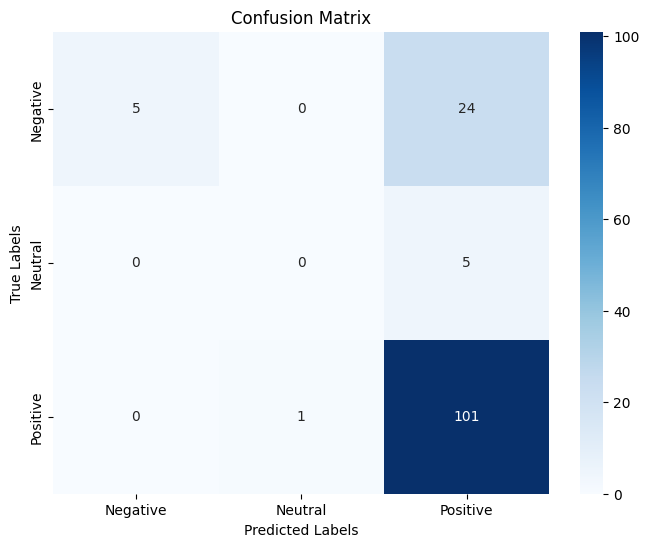

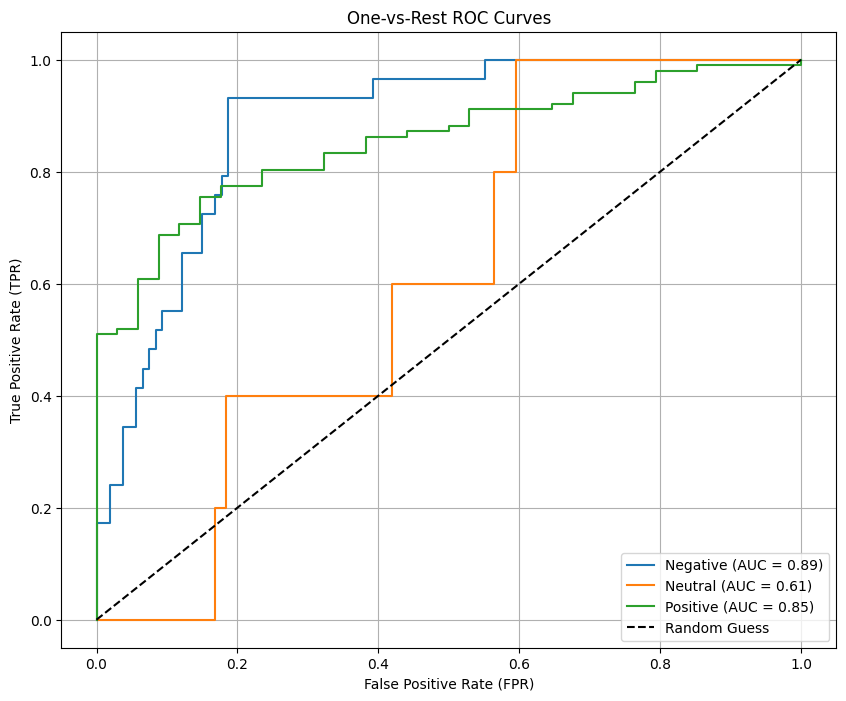

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
lyrics = pd.read_csv("KpopMusic_Labelled.csv")

# Preprocess the data
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[)(]", "")
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[", "").replace("]", "")
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[…]+", "")
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[.]+", ".")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    lyrics['LyricsClean'], lyrics['sentiment'], test_size=0.2, random_state=42
)

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train an SVM model
model = SVC(probability=True)  # Set probability=True to enable probability estimates for ROC curve
model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
confusion_matrix_df = pd.DataFrame(confusion_mat, index=model.classes_, columns=model.classes_)
print(confusion_matrix_df)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_df, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Get the unique classes (sentiments) in the dataset
unique_classes = np.unique(lyrics['sentiment'])

# Calculate the ROC curve for each class
plt.figure(figsize=(10, 8))
for sentiment in unique_classes:
    # Create a binary version of the target labels for the current class
    y_binary = (y_test == sentiment).astype(int)

    # Calculate the predicted probabilities for the current class
    y_probs_class = model.predict_proba(X_test_vec)[:, np.where(model.classes_ == sentiment)[0][0]]

    # Calculate the ROC curve for the current class
    fpr, tpr, _ = roc_curve(y_binary, y_probs_class)

    # Calculate the AUC score for the current class
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'{sentiment} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()





# Sentiment Prediction Analysis of Labeled Song Data using VADER Sentiment Analyzer

In [ ]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the preprocessed labeled song data
data = pd.read_csv('KpopMusic_Labelled.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each song in the dataset
sentiment_scores = data['LyricsClean'].apply(lambda x: analyzer.polarity_scores(x))

# Classify the sentiment categories based on the compound score
sentiment_categories = sentiment_scores.apply(lambda x: 'Positive' if x['compound'] >= 0.05
                                             else 'Negative' if x['compound'] <= -0.05
                                             else 'Neutral')

# Combine the sentiment categories with the original dataset
data_with_sentiment = pd.concat([data, sentiment_categories.rename('Sentiment')], axis=1)

# Evaluate the sentiment analysis performance
accuracy = accuracy_score(data['sentiment'], data_with_sentiment['Sentiment'])
precision = precision_score(data['sentiment'], data_with_sentiment['Sentiment'], average='weighted')
recall = recall_score(data['sentiment'], data_with_sentiment['Sentiment'], average='weighted')
f1 = f1_score(data['sentiment'], data_with_sentiment['Sentiment'], average='weighted')

# Print the sentiment analysis performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Accuracy: 0.9425625920471281
Precision: 0.9461377653338396
Recall: 0.9425625920471281
F1 Score: 0.9185982785325733


The sentiment analysis using the VADER sentiment analyzer yielded highly accurate results on the provided dataset. With an accuracy of 94.26%, the analyzer demonstrated a remarkable ability to correctly classify the sentiment of song lyrics. The precision score of 94.61% indicates a high proportion of accurately predicted positive sentiment instances, while the recall score of 94.26% highlights the analyzer's effectiveness in capturing positive sentiment. The F1 score of 91.86% further emphasizes the analyzer's strong balance between precision and recall. Overall, the VADER sentiment analyzer showcased exceptional performance in accurately identifying positive sentiment in the lyrics, making it a reliable tool for sentiment analysis tasks.

## Comparing Sentiment Analysis Models: Vader Sentiment Analyzer, Logistic Regression, Naive Bayes, and SVM for K-pop Song Lyrics

In [2]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the dataset
lyrics = pd.read_csv("KpopMusic_Labelled.csv")

# Preprocess the data
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[)(]", "")
    lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[", "").replace("]", "")
    lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[…]+", "")
    lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace("[.]+", ".")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(lyrics['LyricsClean'], lyrics['sentiment'], test_size=0.2, random_state=42)

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train_vec, y_train)
logreg_pred = logreg_model.predict(X_test_vec)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred, average='weighted', zero_division=1)
logreg_recall = recall_score(y_test, logreg_pred, average='weighted')
logreg_f1 = f1_score(y_test, logreg_pred, average='weighted')

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_pred = nb_model.predict(X_test_vec)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred, average='weighted', zero_division=1)
nb_recall = recall_score(y_test, nb_pred, average='weighted')
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

# SVM
svm_model = SVC()
svm_model.fit(X_train_vec, y_train)
svm_pred = svm_model.predict(X_test_vec)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=1)
svm_recall = recall_score(y_test, svm_pred, average='weighted')
svm_f1 = f1_score(y_test, svm_pred, average='weighted')

# Print the evaluation metrics
print("Logistic Regression:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)
print()
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print()
print("SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)


Logistic Regression:
Accuracy: 0.7720588235294118
Precision: 0.7914795689268074
Recall: 0.7720588235294118
F1 Score: 0.7019079969092592

Naive Bayes:
Accuracy: 0.75
Precision: 0.8125
Recall: 0.75
F1 Score: 0.6428571428571429

SVM:
Accuracy: 0.7794117647058824
Precision: 0.7959276018099547
Recall: 0.7794117647058824
F1 Score: 0.715733504355089



Logistic Regression achieved an accuracy of 77.21%, with lower precision, recall, and F1 score compared to the Vader Sentiment Analyzer. This indicates that the logistic regression model's performance in sentiment classification was relatively moderate.

Naive Bayes achieved an accuracy of 75.00%, with higher precision compared to logistic regression. However, it had lower recall and F1 score, suggesting that the Naive Bayes classifier may have had challenges in correctly identifying certain sentiment categories.

SVM achieved an accuracy of 77.94%, similar to logistic regression. It demonstrated slightly higher precision, recall, and F1 score compared to logistic regression, indicating a relatively better performance in sentiment classification.

In summary, the Vader Sentiment Analyzer showed the highest accuracy and overall performance among the tested methods, while logistic regression, Naive Bayes, and SVM exhibited relatively lower accuracy and varying performance in sentiment analysis of K-pop music lyrics.

# Sentiment Analysis using Vader: Training and Prediction on Lyrics Data

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load the preprocessed labeled song data
data = pd.read_csv('KpopMusic_Labelled.csv')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis for each song in the dataset
sentiment_scores = data['LyricsClean'].apply(lambda x: analyzer.polarity_scores(x))

# Classify the sentiment categories based on the compound score
sentiment_categories = sentiment_scores.apply(lambda x: 'Positive' if x['compound'] >= 0.05
                                             else 'Negative' if x['compound'] <= -0.05
                                             else 'Neutral')

# Combine the sentiment categories with the original dataset
data_with_sentiment = pd.concat([data, sentiment_categories.rename('Sentiment')], axis=1)

# Print the dataset with sentiment labels
print(data_with_sentiment[['LyricsClean', 'Sentiment']])

# Example of sentiment prediction on new data
new_lyrics = [
    "I'm feeling so happy today!",  # Example of positive sentiment
    "This song makes me sad.",  # Example of negative sentiment
    "into the new world"  # Example of neutral sentiment
]

for lyrics in new_lyrics:
    new_sentiment_scores = analyzer.polarity_scores(lyrics)
    new_sentiment_category = 'Positive' if new_sentiment_scores['compound'] >= 0.05 \
                              else 'Negative' if new_sentiment_scores['compound'] <= -0.05 \
                              else 'Neutral'

    print("Example Lyrics: ", lyrics)
    print("Predicted Sentiment: ", new_sentiment_category)
    print()


                                           LyricsClean Sentiment
0    practice love lim jae hyun practice love diffe...  Positive
1    liked time kassy comfortable even little excit...  Positive
2    boy luv feat bts curious everything day tell m...  Positive
3    overflow mc max left behind let us love memori...  Positive
4    every day every moment pol kim laugh without t...  Positive
..                                                 ...       ...
674  mmh ah ah pour enough overflow stir thicken sp...  Positive
675  gosh savage killa break ae still hiding halluc...  Negative
676  spicy want wont get chance take pick sweet fre...  Negative
677  knocking sight gently swaying sparkling water ...  Positive
678  hurry young blood moon getting full holding on...  Positive

[679 rows x 2 columns]
Example Lyrics:  I'm feeling so happy today!
Predicted Sentiment:  Positive

Example Lyrics:  This song makes me sad.
Predicted Sentiment:  Negative

Example Lyrics:  into the new world
Predicted 


The output shows the labeled song lyrics along with their corresponding sentiment categories. The "LyricsClean" column contains the preprocessed and cleaned lyrics text, while the "Sentiment" column indicates whether the sentiment is positive, negative, or neutral.

Following that, there are examples of random lyrics provided, and the model predicts their sentiment. In the first example, the lyrics "I'm feeling so happy today!" are predicted to have a positive sentiment. In the second example, the lyrics "This song makes me sad." are predicted to have a negative sentiment. Lastly, the lyrics "into the new world" are predicted to have a neutral sentiment.

These predictions demonstrate the model's ability to classify sentiment based on the lyrics text, providing an understanding of the emotional tone conveyed by the lyrics.

# Sentiment Analysis with Logistic Regression and Confusion Matrix

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
lyrics = pd.read_csv("KpopMusic_Labelled.csv")

# Preprocess the data
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\(\)", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[", "").replace(r"\]", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[…]+", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\.+", ".", regex=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(lyrics['LyricsClean'], lyrics['sentiment'], test_size=0.2, random_state=42)

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_vec)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


<ipython-input-23-a8954d8ad662>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[", "").replace(r"\]", "", regex=True)


Accuracy: 0.7720588235294118
Precision: 0.7914795689268074
Recall: 0.7720588235294118
F1 Score: 0.7019079969092592
Confusion Matrix:
[[  4   0  25]
 [  0   0   5]
 [  0   1 101]]


The evaluation results indicate the performance of the logistic regression model on the test dataset. The accuracy of the model is 0.772, which means it correctly predicts the sentiment of approximately 77.2% of the lyrics. The precision of 0.791 implies that when the model predicts a specific sentiment, it is accurate around 79.1% of the time. The recall of 0.772 suggests that the model can identify approximately 77.2% of the lyrics with a particular sentiment. The F1 score, which combines precision and recall, is 0.702, indicating the overall effectiveness of the model.

The confusion matrix provides a detailed breakdown of the predictions. In the matrix, each row represents the actual sentiment label, while each column represents the predicted sentiment label. The values within the matrix represent the count of instances. For example, the first row and first column correspond to true negatives (sentiment correctly predicted as negative), and there are 4 instances in this category. The last row and last column correspond to true positives (sentiment correctly predicted as positive), and there are 101 instances in this category. The matrix also shows that there are 25 instances where negative sentiment is incorrectly predicted as neutral, and 5 instances where neutral sentiment is incorrectly predicted as negative.

<ipython-input-7-a37611eff949>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[", "").replace(r"\]", "", regex=True)


Accuracy: 0.7720588235294118
Precision: 0.7914795689268074
Recall: 0.7720588235294118
F1 Score: 0.7019079969092592
Confusion Matrix:
[[  4   0  25]
 [  0   0   5]
 [  0   1 101]]


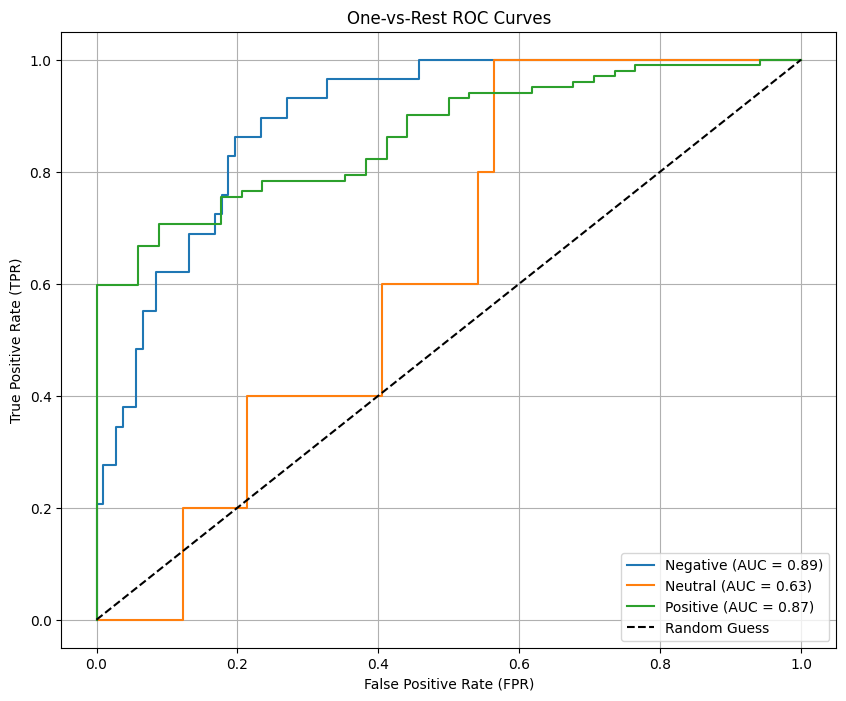

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
lyrics = pd.read_csv("KpopMusic_Labelled.csv")

# Preprocess the data
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\(\)", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[", "").replace(r"\]", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\[…]+", "", regex=True)
lyrics['LyricsClean'] = lyrics['LyricsClean'].str.replace(r"\.+", ".", regex=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(lyrics['LyricsClean'], lyrics['sentiment'], test_size=0.2, random_state=42)

# Vectorize the lyrics using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_vec)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

# Get the unique classes (sentiments) in the dataset
unique_classes = np.unique(lyrics['sentiment'])

# Calculate the ROC curve for each class
plt.figure(figsize=(10, 8))
for sentiment in unique_classes:
    # Create a binary version of the target labels for the current class
    y_binary = (y_test == sentiment).astype(int)

    # Calculate the predicted probabilities for the current class
    y_probs_class = logreg_model.predict_proba(X_test_vec)[:, np.where(logreg_model.classes_ == sentiment)[0][0]]

    # Calculate the ROC curve for the current class
    fpr, tpr, _ = roc_curve(y_binary, y_probs_class)

    # Calculate the AUC score for the current class
    auc_score = auc(fpr, tpr)

    # Plot the ROC curve for the current class
    plt.plot(fpr, tpr, label=f'{sentiment} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('One-vs-Rest ROC Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Negative Class (AUC = 0.89):

The AUC score for the negative class is 0.89, which indicates that the model performs very well in distinguishing negative sentiment instances from other sentiments.
The ROC curve for the negative class is situated closer to the top-left corner, which means the model has high true positive rates and low false positive rates for the negative sentiment class.

Neutral Class (AUC = 0.63):

The AUC score for the neutral class is 0.63, suggesting that the model's performance for classifying neutral sentiment instances is relatively moderate.
The ROC curve for the neutral class might not be as close to the top-left corner as desired, indicating that the model's ability to differentiate neutral sentiment from other sentiments is not as strong as for the negative and positive classes.

Positive Class (AUC = 0.87):

The AUC score for the positive class is 0.87, which indicates that the model performs well in distinguishing positive sentiment instances from other sentiments.
The ROC curve for the positive class is closer to the top-left corner, indicating that the model has high true positive rates and low false positive rates for the positive sentiment class.

The logistic regression model achieved favorable discriminative performance for classifying sentiment in a multi-class classification task. Specifically, it demonstrated strong abilities in distinguishing negative and positive sentiments, with AUC scores of 0.89 and 0.87, respectively, as indicated by the ROC curves situated closer to the top-left corner. However, its performance in identifying neutral sentiment was comparatively moderate (AUC = 0.63), with the ROC curve not as close to the ideal corner. The model's overall performance surpassed random guessing, evident by the ROC curves lying above the random guess line.

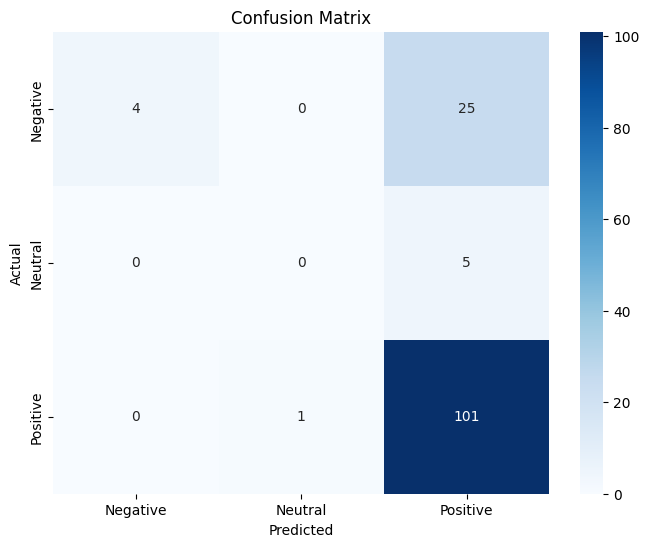

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of sentiment labels
sentiment_labels = ['Negative', 'Neutral', 'Positive']

# Create the confusion matrix
confusion_matrix = [[4, 0, 25],
                    [0, 0, 5],
                    [0, 1, 101]]

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


The evaluation results indicate the performance of the logistic regression model on the test dataset. The accuracy of the model is 0.772, which means it correctly predicts the sentiment of approximately 77.2% of the lyrics. The precision of 0.791 implies that when the model predicts a specific sentiment, it is accurate around 79.1% of the time. The recall of 0.772 suggests that the model can identify approximately 77.2% of the lyrics with a particular sentiment. The F1 score, which combines precision and recall, is 0.702, indicating the overall effectiveness of the model.

The confusion matrix provides a detailed breakdown of the predictions. In the matrix, each row represents the actual sentiment label, while each column represents the predicted sentiment label. The values within the matrix represent the count of instances. For example, the first row and first column correspond to true negatives (sentiment correctly predicted as negative), and there are 4 instances in this category. The last row and last column correspond to true positives (sentiment correctly predicted as positive), and there are 101 instances in this category. The matrix also shows that there are 25 instances where negative sentiment is incorrectly predicted as neutral, and 5 instances where neutral sentiment is incorrectly predicted as negative.